Nama : Dini Aryani

Kode : PYTN-KS19-06

# London Crime Data 2008-2016

Dataset ini digunakan untuk menganalisis kejahatan di London selama beberapa tahun. Berikut adalah penjelasan tentang fitur-fitur yang ada dalam dataset tersebut:

1. lsoa_code: Ini adalah kode yang mewakili "Lower-layer Super Output Area" (LSOA), yaitu unit geografis kecil yang digunakan untuk pelaporan statistik di Inggris.

2. borough: Nama borough atau distrik di London di mana kejahatan tersebut dilaporkan.

3. major_category: Kategori utama dari jenis kejahatan yang dilaporkan, seperti "Violence Against the Person" atau "Burglary."

4. minor_category: Kategori kejahatan minor yang lebih spesifik dalam kategori utama, misalnya, "Harassment" atau "Robbery."

5. value: Jumlah insiden atau jumlah kejadian yang terkait dengan kategori kejahatan tertentu di wilayah tersebut.

6. year: Tahun ketika data kejahatan tersebut dilaporkan.

7. month: Bulan ketika data kejahatan tersebut dilaporkan.

In [118]:
#import library
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium
import seaborn as sns
import matplotlib.patches as mpatches
mpl.style.use('ggplot') 
mpl.__version__

'3.7.2'

In [119]:
# membaca dataset
df = pd.read_csv('london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


## Data Cleaning

In [120]:
# Menghapus baris dengan nilai 'value' sama dengan 0 karena dapat disimpulkan tidak ada kejahatan yang terjadi
data = df[df.value != 0]
data

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [121]:
print('data dimensions:', data.shape)

data dimensions: (3419099, 7)


In [122]:
# Mengidentifikasi missing values
print(data.isnull().sum())

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


In [123]:
# Mengidentifikasi dan Menghapus Data Duplikat
duplicates = data[data.duplicated()]
data.drop_duplicates(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10908\3725535602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3419099 entries, 9 to 13490600
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 208.7+ MB


In [125]:
# Menampilkan statistik deskriptif 
data.describe()

,value,year,month
count,3.419099e+06,3.419099e+06,3.419099e+06
mean,1.885806e+00,2.011991e+03,6.511021e+00
std,3.118902e+00,2.602550e+00,3.422459e+00
min,1.000000e+00,2.008000e+03,1.000000e+00
25%,1.000000e+00,2.010000e+03,4.000000e+00
50%,1.000000e+00,2.012000e+03,7.000000e+00
75%,2.000000e+00,2.014000e+03,9.000000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Data preprocessing

In [126]:
data["major_category"].value_counts()

major_category
Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: count, dtype: int64

In [127]:
data["minor_category"].value_counts()

minor_category
Other Theft                               297281
Theft From Motor Vehicle                  291839
Burglary in a Dwelling                    278792
Assault with Injury                       244990
Harassment                                243827
Common Assault                            231398
Possession Of Drugs                       201464
Criminal Damage To Motor Vehicle          179380
Theft/Taking Of Motor Vehicle             163069
Burglary in Other Buildings               162417
Personal Property                         144078
Other Theft Person                        121674
Criminal Damage To Dwelling               121592
Other Criminal Damage                     112449
Theft/Taking of Pedal Cycle               104947
Theft From Shops                           94947
Wounding/GBH                               90482
Other Notifiable                           75483
Criminal Damage To Other Building          52847
Other violence                             50620
Motor

In [128]:
count_borough = data.groupby('borough')['value'].sum()
count_borough.sort_values(ascending=False)

borough
Westminster               455028
Lambeth                   292178
Southwark                 278809
Camden                    275147
Newham                    262024
Croydon                   260294
Ealing                    251562
Islington                 230286
Tower Hamlets             228613
Brent                     227551
Hackney                   217119
Lewisham                  215137
Haringey                  213272
Barnet                    212191
Hillingdon                209680
Wandsworth                204741
Waltham Forest            203879
Enfield                   193880
Hounslow                  186772
Hammersmith and Fulham    185259
Bromley                   184349
Redbridge                 183562
Greenwich                 181568
Kensington and Chelsea    171981
Barking and Dagenham      149447
Havering                  138947
Harrow                    116848
Merton                    115654
Bexley                    114136
Sutton                    100987
Ri

In [129]:
data['value'].sum()

6447758

distrik paling banyak kejahatannya adalah Westminster, sedangkan yang paling minim kejahatannya adalah city of london

In [130]:
# mengurutkan data
data.sort_values(by='value', ascending=False, axis=0, inplace=True)
data.head(5)

C:\Users\hp\AppData\Local\Temp\ipykernel_10908\658149048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by='value', ascending=False, axis=0, inplace=True)


,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1


kejahatan tertinggi ada di distrik Tower Hamlets dengan kategori Possession of Drugs sebanyak 309 di bulan juli 2012

In [131]:
# Menghapus kolom major_category dan minor_category
df_no_category = data.drop(['major_category', 'minor_category'], axis=1)
df_no_category

,lsoa_code,borough,value,year,month
1608904,E01004234,Tower Hamlets,309,2012,6
13423472,E01004734,Westminster,300,2008,3
3277025,E01004734,Westminster,288,2008,11
12317524,E01004734,Westminster,286,2008,12
9579977,E01004734,Westminster,281,2009,1
...,...,...,...,...,...
5530446,E01001688,Greenwich,1,2009,4
5530451,E01002598,Hounslow,1,2015,11
5530471,E01004232,Tower Hamlets,1,2012,4
5530472,E01000113,Barking and Dagenham,1,2015,7


## Data Visualisasi

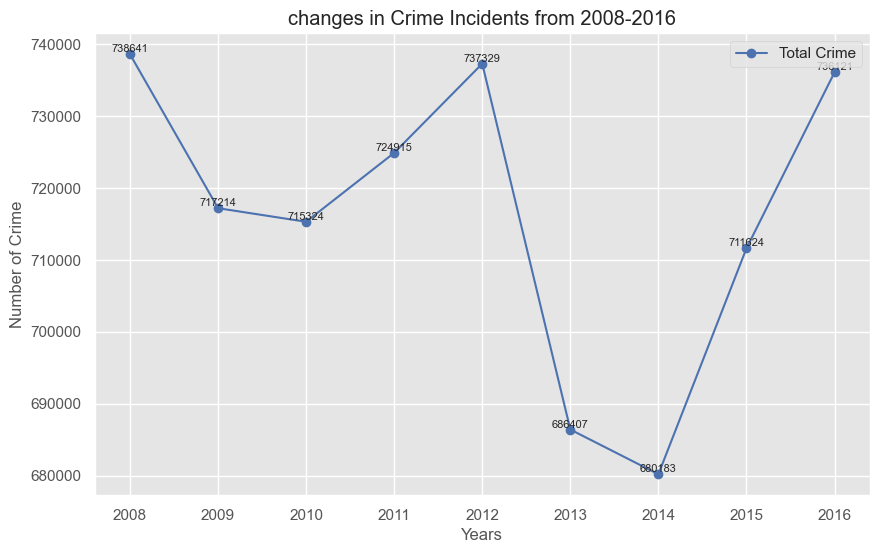

In [132]:
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah kejahatan per tahun
crime_year = data.groupby('year')['value'].sum()

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(crime_year.index, crime_year.values, marker='o', linestyle='-', color='b', label='Total Crime')
plt.title('Changes in Crime Incidents from 2008-2016')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.grid(True)

# Menambahkan label sumbu x dan y
plt.xlabel('Years')
plt.ylabel('Number of Crime')

# Menambahkan judul dan legenda
plt.title('changes in Crime Incidents from 2008-2016')
plt.legend()

# Menambahkan angka pertahun di atas titik-titik pada plot
for i, j in zip(crime_year.index, crime_year.values):
    plt.annotate(str(j), xy=(i, j), fontsize=8, ha='center', va='bottom')

# Menampilkan plot
plt.show()

In [133]:
print(crime_year)
crime_year.sum()

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64


6447758

Kesimpulan : Kejahatan paling banyak berada di tahun 2008 dengan total kejahatan 738641, dan total kejahatan dari tahun 2008-2016 adalah 6447758

### Area Plot

In [134]:
# mengelompokkan data berdasarkan 'borough' dan 'year' lalu hitung jumlah kejahatan
df_london = data.groupby(['borough', 'year'])['value'].sum().reset_index()

# Mengurutkan data berdasarkan value terbanyak
df_london.sort_values(by='value', ascending=False, axis=0, inplace=True)
df_london.head()

,borough,year,value
289,Westminster,2012,59226
288,Westminster,2011,54243
290,Westminster,2013,53852
286,Westminster,2009,48456
293,Westminster,2016,48330


In [135]:
# Transpose
df_londonT = df_london.pivot(index='year', columns='borough', values='value')
df_londonT.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656.0,23944.0,15305.0,23504.0,24015.0,32010.0,NaN,29516.0,28947.0,21980.0,...,13875.0,29752.0,20873.0,11106.0,33470.0,12943.0,23578.0,24080.0,23330.0,47846.0
2009,17713.0,23449.0,14445.0,24748.0,21858.0,31612.0,NaN,29784.0,28617.0,21147.0,...,13561.0,28610.0,20837.0,10618.0,30623.0,12240.0,21959.0,24761.0,23021.0,48456.0
2010,17130.0,23416.0,13166.0,25512.0,19572.0,31804.0,NaN,29373.0,31360.0,20808.0,...,13595.0,30728.0,20652.0,10601.0,31320.0,12032.0,23072.0,24818.0,22815.0,48116.0
2011,16686.0,24007.0,11325.0,27669.0,19868.0,33956.0,69.0,29830.0,29537.0,21041.0,...,13548.0,27978.0,21994.0,10896.0,30723.0,11068.0,24712.0,23714.0,21384.0,54243.0
2012,15990.0,23573.0,11669.0,26357.0,19622.0,31472.0,157.0,30189.0,28832.0,21069.0,...,12856.0,30067.0,21424.0,11168.0,30737.0,10948.0,26784.0,22647.0,24457.0,59226.0


In [136]:
# Mengurutkan borough dengan total value terbanyak
df_TopBorough = data.groupby(['borough'])['value'].sum().reset_index()
df_TopBorough.sort_values(by='value', ascending=False, axis=0, inplace=True)
df_TopBorough.head(5)

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024


In [137]:
# Membuat dataframe baru dari dataframe df_londonT dengan fitur borough 5 teratas
df_londonArea = df_londonT[['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham']]
df_londonArea

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846.0,31717.0,33470.0,32010.0,29752.0
2009,48456.0,31225.0,30623.0,31612.0,28610.0
2010,48116.0,31671.0,31320.0,31804.0,30728.0
2011,54243.0,33224.0,30723.0,33956.0,27978.0
2012,59226.0,33473.0,30737.0,31472.0,30067.0
2013,53852.0,31868.0,31128.0,28435.0,27577.0
2014,47564.0,31765.0,28912.0,27198.0,28005.0
2015,47395.0,33164.0,30260.0,29477.0,29217.0
2016,48330.0,34071.0,31636.0,29183.0,30090.0


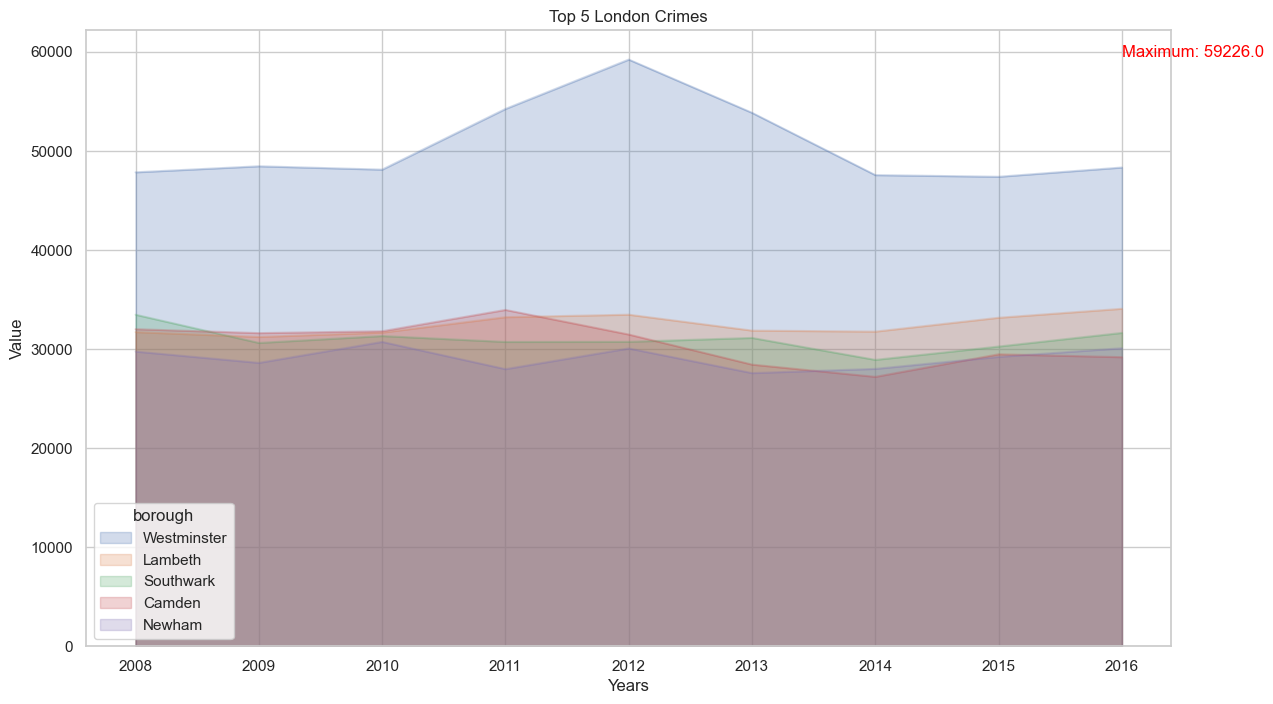

In [138]:
# Menentukan tema Seaborn
sns.set(style="whitegrid")  # Contoh tema Seaborn

# Membuat plot area
ax = df_londonArea.plot(kind='area', stacked=False, figsize=(14, 8), alpha=0.25)
plt.title('Top 5 London Crimes') 
plt.ylabel('Value')
plt.xlabel('Years')

# Menemukan titik tertinggi dalam data
max_value = df_londonArea.max().max()
max_year = df_londonArea.idxmax().max()

# Menambahkan label dengan angka pada titik tertinggi
plt.text(max_year, max_value, f'Maximum: {max_value}', fontsize=12, ha='left', va='bottom', color='red')

# Menampilkan plot
plt.show()

kesimpulan : dari tahun 2008 - 2016 Westminster menempati peringkat tertinggi distrik dengan kejahatan terbanyak, puncaknya di tahun 2012 sebanyak 59226

### Barchart

Membandingkan jumlah kejahatan perbulan pada tahun 2012 di distrik/borough westminster.

In [139]:
# Filter data untuk Westminster dan tahun 2012
df_wesminster = data[(data['borough'] == 'Westminster') & (data['year'] == 2012)]

# Menghapus kolom major_category dan minor_category
df_wesminster = df_wesminster.drop(['major_category', 'minor_category'], axis=1)

# Menggabungkan data berdasarkan bulan dan menghitung total frekuensi kejahatan per bulan
df_wesminster_grouped = df_wesminster.groupby('month')['value'].sum().reset_index()
df_wesminster_grouped

,month,value
0,1,5084
1,2,4381
2,3,5362
3,4,4623
4,5,5104
5,6,4797
6,7,5428
7,8,5246
8,9,4341
9,10,4761


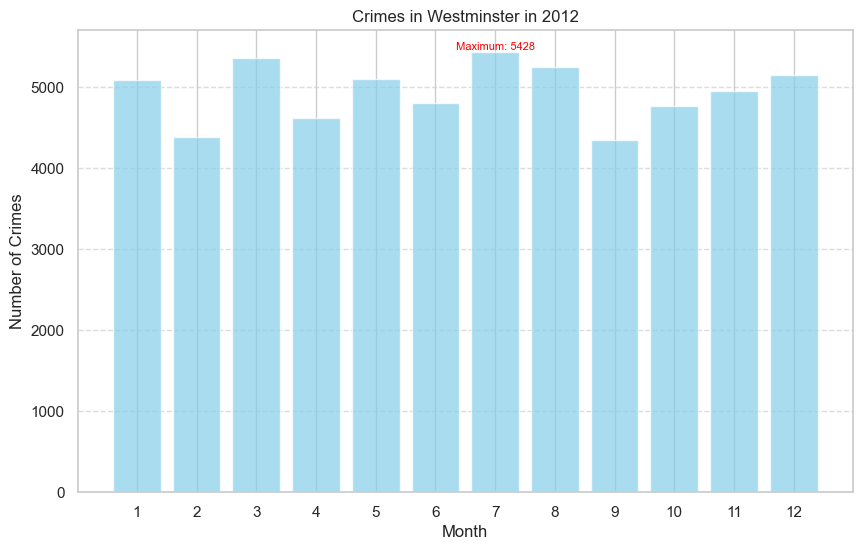

In [140]:
# Membuat histogram frekuensi kejahatan per bulan
plt.figure(figsize=(10, 6))
plt.bar(df_wesminster_grouped['month'], df_wesminster_grouped['value'], color='skyblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes in Westminster in 2012')
plt.xticks(df_wesminster_grouped['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menemukan jumlah kejahatan paling banyak
max_crime = df_wesminster_grouped['value'].max()
month_max_crime = df_wesminster_grouped[df_wesminster_grouped['value'] == max_crime]['month'].values[0]

# Menambahkan label dengan angka jumlah kejahatan paling banyak
plt.text(month_max_crime, max_crime, f'Maximum: {max_crime}', fontsize=8, ha='center', va='bottom', color='red')

plt.show()

kesimpulan : kejahatan paling banyak di kota westminster ada di bulan juli 2012

In [141]:
df_TopBorough.tail()

,borough,value
2,Bexley,114136
28,Sutton,100987
26,Richmond upon Thames,96771
20,Kingston upon Thames,89306
6,City of London,780


In [142]:
# Membuat dataframe baru dari dataframe df_londonT dengan fitur borough 5 teratas
df_westminster_london = df_londonT[['Westminster', 'City of London']]
df_westminster_london

borough,Westminster,City of London
year,,
2008,47846.0,NaN
2009,48456.0,NaN
2010,48116.0,NaN
2011,54243.0,69.0
2012,59226.0,157.0
2013,53852.0,110.0
2014,47564.0,115.0
2015,47395.0,151.0
2016,48330.0,178.0


## Histogram

In [143]:
# Hitung frekuensi kejahatan per kategori utama
crime_counts = data['major_category'].value_counts()
crime_counts

major_category
Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: count, dtype: int64

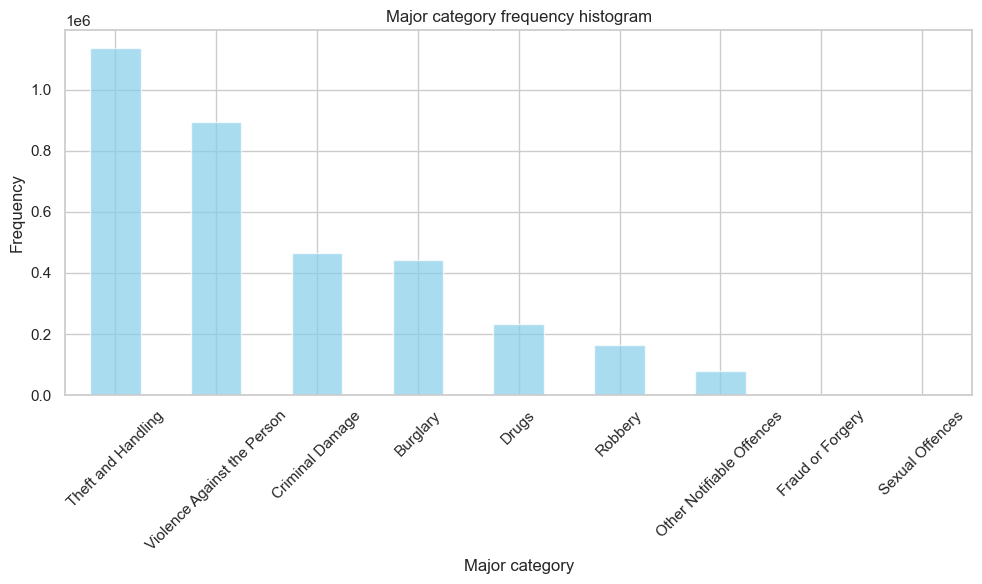

In [144]:
# Buat histogram
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Atur label sumbu dan judul
plt.xlabel('Major category')
plt.ylabel('Frequency')
plt.title('Major category frequency histogram')

# Tampilkan histogram
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

kesimpulan : Major category dengan frekuensi kejadian paling tinggi adalah Theft and handling 

In [145]:
# Filter entri dengan major category "Drugs"
drugs = data[data['major_category'] == 'Drugs']

# Mengelompokkan data berdasarkan tahun dan menghitung jumlahnya
drugs_by_year = drugs.groupby('year')['value'].sum()

# Tampilkan hasil
print(drugs_by_year)

year
2008    68804
2009    60549
2010    58674
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: value, dtype: int64


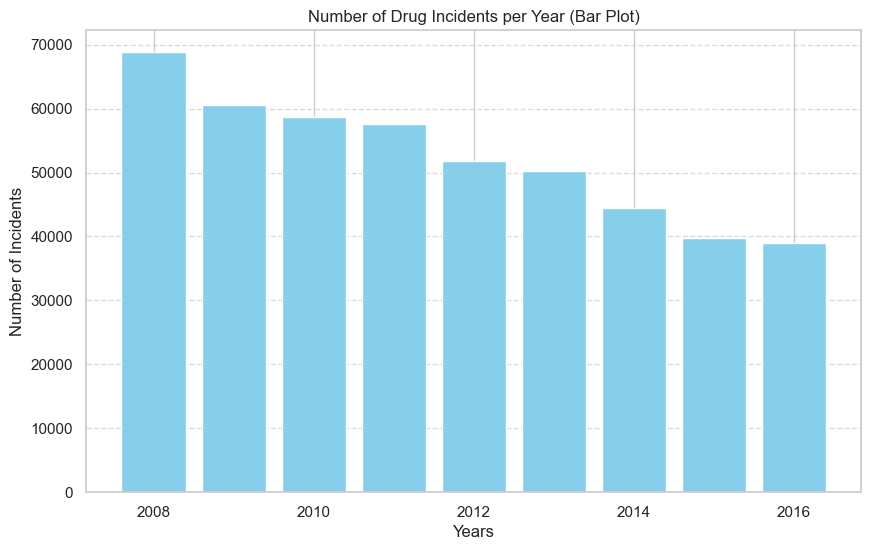

In [146]:
# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(drugs_by_year.index, drugs_by_year.values, color='skyblue')
plt.title('Number of Drug Incidents per Year (Bar Plot)')
plt.xlabel('Years')
plt.ylabel('Number of Incidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

kesimpulan : kasus narkoba setiap tahun menurun

<Axes: ylabel='Frequency'>

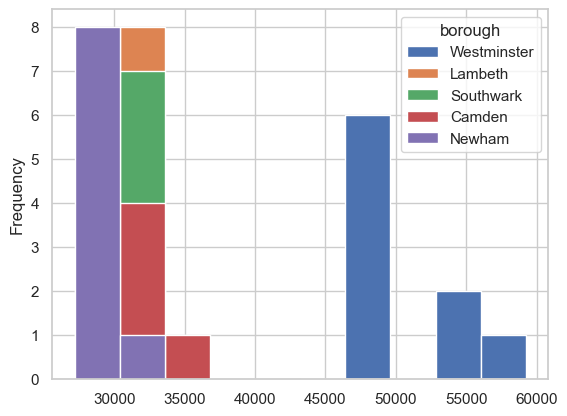

In [147]:
df_londonArea.plot.hist()

In [148]:
data.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1
11201180,E01004734,Westminster,Theft and Handling,Other Theft,280,2009,12
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
12914969,E01004734,Westminster,Theft and Handling,Other Theft,262,2009,11
9164301,E01004734,Westminster,Theft and Handling,Other Theft,260,2009,3


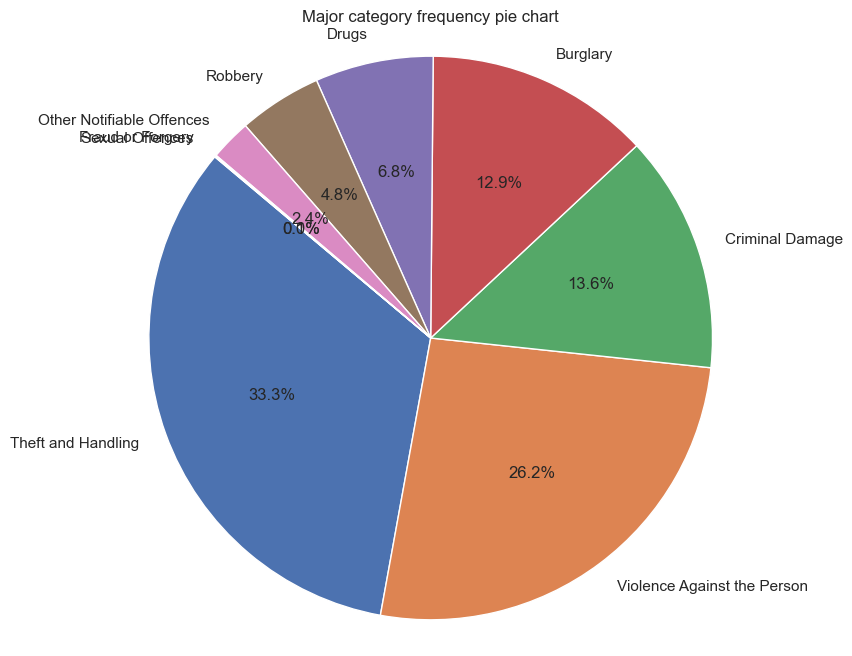

In [149]:
# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140)

# Atur judul
plt.title('Major category frequency pie chart')

# Tampilkan pie chart
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.show()

kesimpulan : kategori utama kejahatan paling banyak yaitu theft and handling, sebanyak 30,3% dari total keseluruhan.

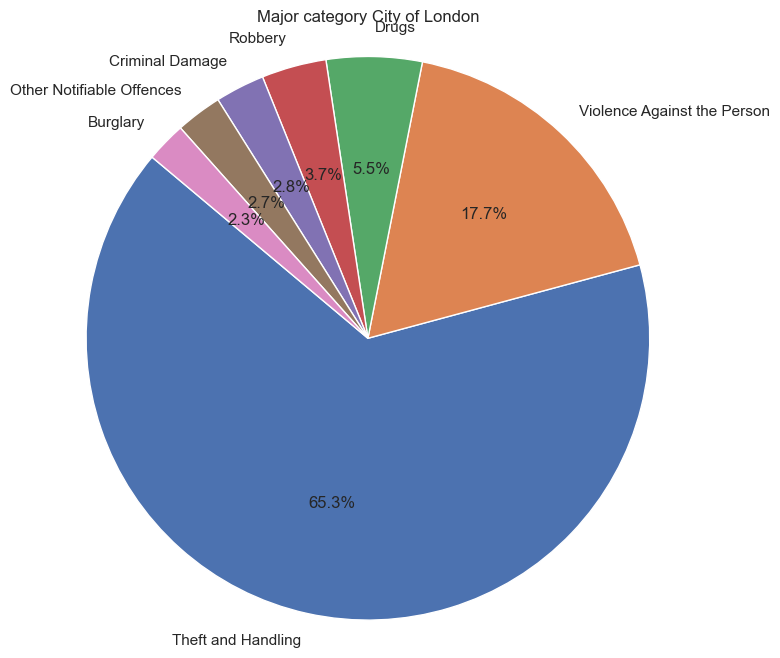

In [150]:
# Filter data untuk Borough "City of London" dan hitung jumlah major category
city_of_london_data = data[data['borough'] == 'City of London']
major_category_counts = city_of_london_data['major_category'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(major_category_counts, labels=major_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Major category City of London')
plt.axis('equal')  # Untuk membuat pie chart berbentuk lingkaran

# Tampilkan pie chart
plt.show()

di distrik teraman pun yaitu city of london, theft and handling masih menjadi kategori kejahatan mayoritas, tercatat ada 65,3%

## Boxplot

In [151]:
df_westminster = df_westminster_london['Westminster']
df_westminster

year
2008    47846.0
2009    48456.0
2010    48116.0
2011    54243.0
2012    59226.0
2013    53852.0
2014    47564.0
2015    47395.0
2016    48330.0
Name: Westminster, dtype: float64

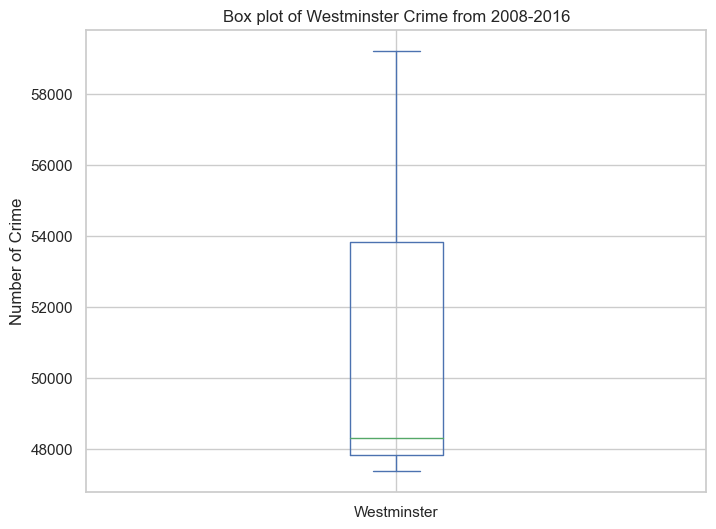

In [152]:
# boxplot sebaran data dari distrik teraman dan paling banyak kejahatannya
df_westminster.plot(kind='box', figsize=(8, 6), grid=True)

plt.title('Box plot of Westminster Crime from 2008-2016')
plt.ylabel('Number of Crime')

plt.show()

- Jumlah minimum kasus (outlier bawah) sekitar 47.000 (min), 
- Jumlah maksimum kasus (outlier atas) sekitar 59.000 (max), 
- Median dari data pertahun adalah < 48.000 .
- kuartil bawah sekitar 48000
- kuartil atas sekitar 54000
- sekitar 5% data kurang dari Q1
- sekitar 40% data lebih dari Q3
- 

Kita bisa melihat angka aktual dengan memanggil metode describe() pada dataframe.

In [153]:
df_westminster.describe()

count        9.000000
mean     50558.666667
std       4201.683918
min      47395.000000
25%      47846.000000
50%      48330.000000
75%      53852.000000
max      59226.000000
Name: Westminster, dtype: float64

## Scatter Plot

In [154]:
df_no_category.head()

,lsoa_code,borough,value,year,month
1608904,E01004234,Tower Hamlets,309,2012,6
13423472,E01004734,Westminster,300,2008,3
3277025,E01004734,Westminster,288,2008,11
12317524,E01004734,Westminster,286,2008,12
9579977,E01004734,Westminster,281,2009,1


In [155]:
df_year = df_no_category.groupby('year')['value'].sum().reset_index()
df_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


<Axes: xlabel='year', ylabel='value'>

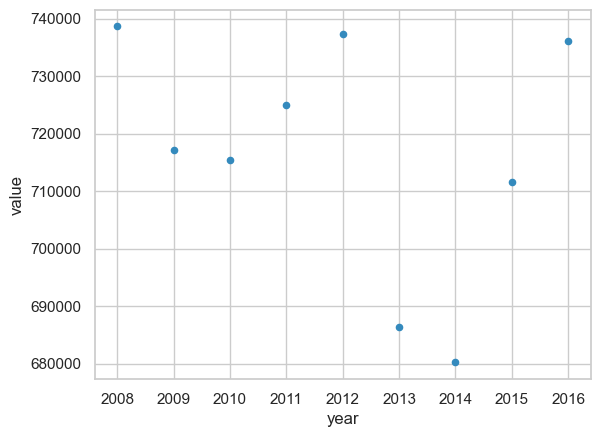

In [156]:
df_year.plot.scatter(x='year', y='value')
# dilihat dari plotnya berarti tidak ada korelasi antara value dan year. setiap tahun memiliki jumlah kejahatan beragam.

Scatter Plot dibawah ini untuk Menyoroti Kategori Mayor Tertentu: untuk menggambarkan hubungan antara "value" dan "year" pada kategori mayor tertentu.

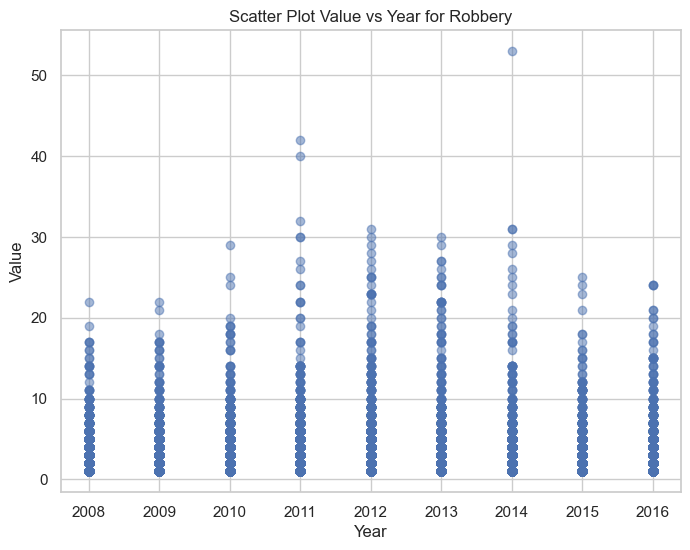

In [157]:
# Scatter plot "value" vs "year" hanya untuk kategori mayor "Robbery"
robbery_data = data[data['major_category'] == 'Robbery']
plt.figure(figsize=(8, 6))
plt.scatter(robbery_data['year'], robbery_data['value'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot Value vs Year for Robbery')
plt.show()

terdapat data outlier pada kategori robbery di tahun 2014

Scatter Plot untuk Melihat Korelasi "value" dengan "month" untuk melihat apakah ada pola musiman dalam data.

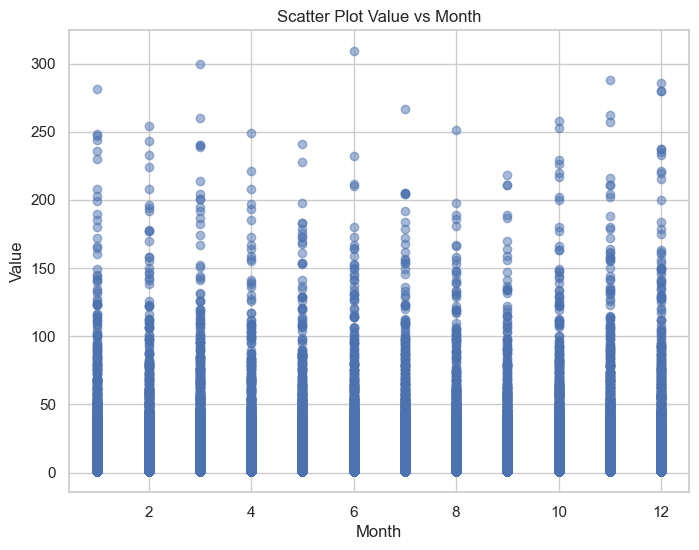

In [158]:
# Scatter plot "value" vs "month"
plt.figure(figsize=(8, 6))
plt.scatter(data['month'], data['value'], alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Scatter Plot Value vs Month')
plt.show()

In [159]:
df_city_london = data[data['borough'] == 'City of London']
df_city_london = df_city_london.groupby('year')['value'].sum().reset_index()
print(df_city_london)

   year  value
0  2011     69
1  2012    157
2  2013    110
3  2014    115
4  2015    151
5  2016    178


<Axes: xlabel='year', ylabel='value'>

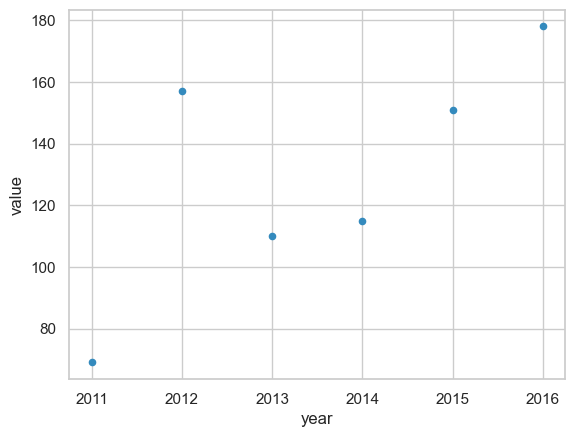

In [160]:
df_city_london.plot.scatter(x='year', y='value')

kejahatan yang terjadi di city of london cenderung meningkat setiap tahun nya

## Word Clouds

In [161]:
from wordcloud import WordCloud, STOPWORDS
print('wordcloud is installed and imported!')

wordcloud is installed and imported!


In [162]:
# Mengelompokkan data berdasarkan "minor_category" dan menghitung total "value"
minor_category_counts = data.groupby('minor_category')['value'].sum().reset_index()
minor_category_counts = minor_category_counts.sort_values(by='value', ascending=False)
minor_category_counts.head()

,minor_category,value
21,Other Theft,980085
27,Theft From Motor Vehicle,569956
2,Burglary in a Dwelling,491282
12,Harassment,458124
0,Assault with Injury,451001


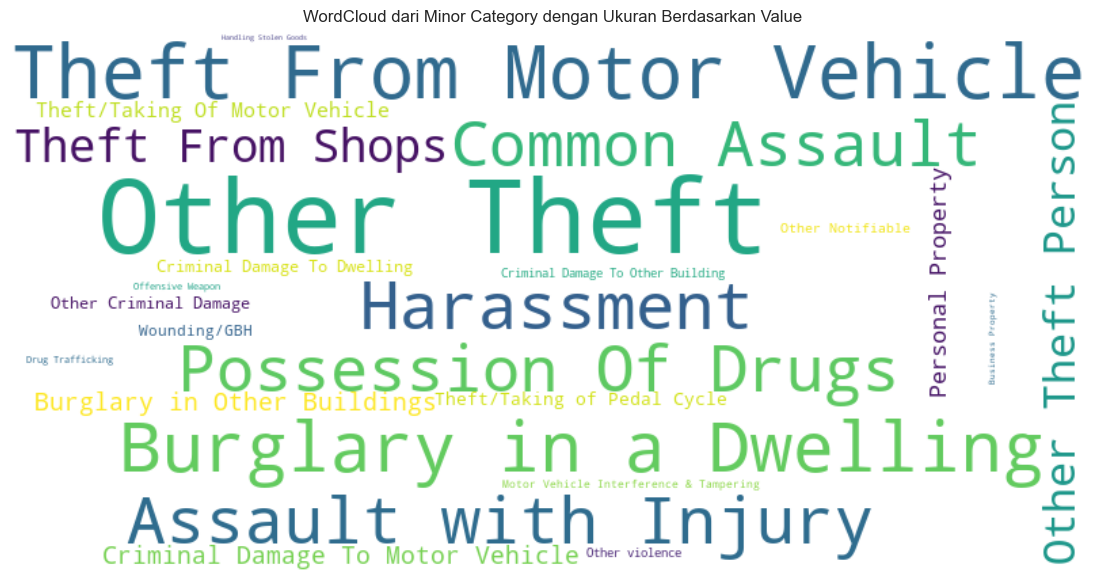

In [163]:
minor_category_dict = dict(zip(minor_category_counts['minor_category'], minor_category_counts['value']))

# Mengatur ukuran WordCloud sesuai dengan nilai
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(minor_category_dict)

# Menampilkan WordCloud
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Minor Category dengan Ukuran Berdasarkan Value')
plt.show()

In [164]:
df_TopBorough.head(10)

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


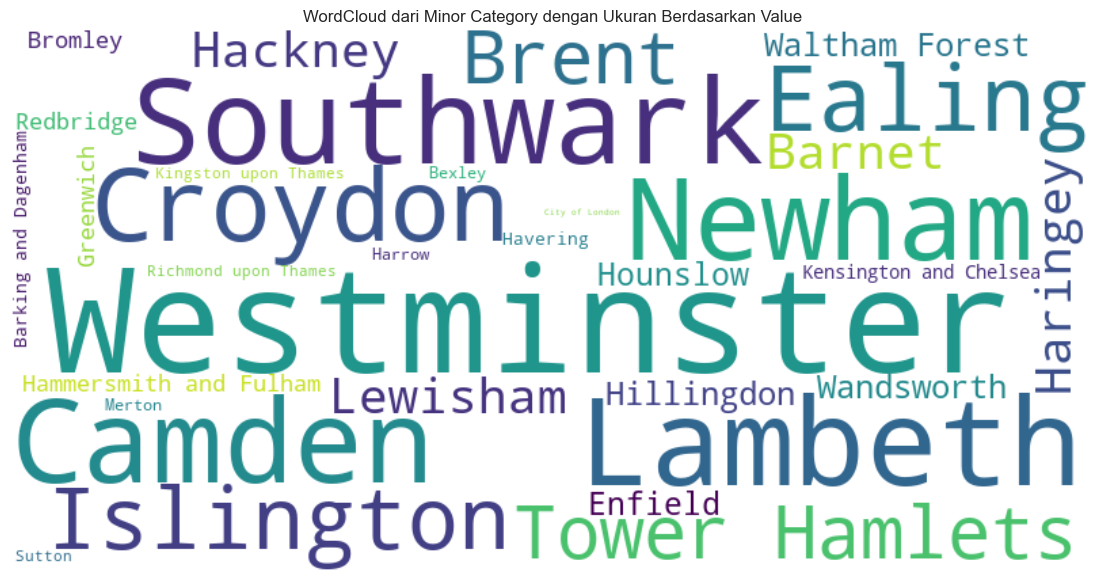

In [165]:
df_TopBorough_dict = dict(zip(df_TopBorough['borough'], df_TopBorough['value']))

# Mengatur ukuran WordCloud sesuai dengan nilai
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_TopBorough_dict)

# Menampilkan WordCloud
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Minor Category dengan Ukuran Berdasarkan Value')
plt.show()

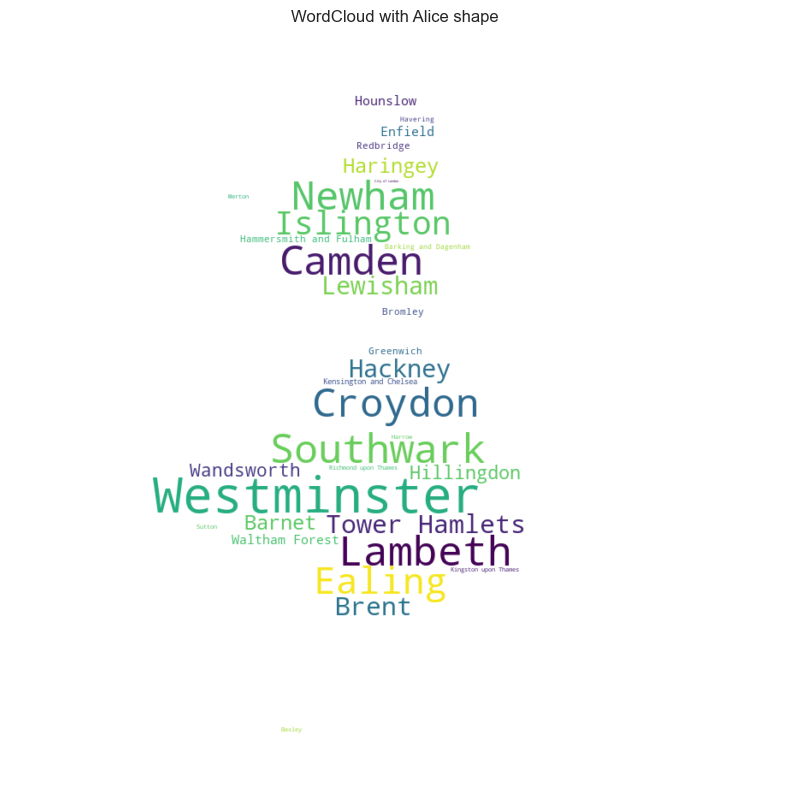

In [166]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the 'alice_mask.png' image and convert it to grayscale
alice_mask = np.array(Image.open("alice_mask.png").convert('L'))  # Convert to grayscale

# Create a WordCloud object using the mask
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=alice_mask)

# Generate WordCloud from the frequencies
wordcloud.generate_from_frequencies(df_TopBorough_dict)

# Display the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud with Alice shape')
plt.show()


## Folium Maps

In [167]:
import folium

In [168]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [169]:
# define the world map centered around London with a low zoom level
world_map = folium.Map(location=[51.509865, -0.118092], zoom_start=14)  # latitude longitude

# display world map
world_map

In [170]:
# Stamen Toner
world_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12, tiles='Stamen Toner') 
world_map

In [171]:
# Stamen Toner
world_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12, tiles='Stamen Terrain') 
world_map

In [172]:
df_TopBorough

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551
